In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix #Evaluation of model
from sklearn.metrics import roc_curve,roc_auc_score

In [80]:
train=pd.read_csv("Titanictrain.csv")
test=pd.read_csv("Titanictest.csv")

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,family_cat,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2,Small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,Single,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,Single,Mr


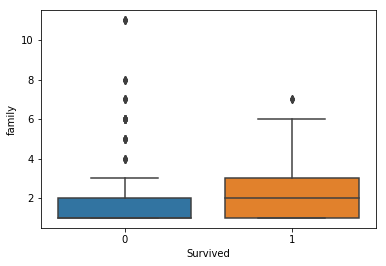

In [12]:
sns.boxplot(y="family",x="Survived",data=train)

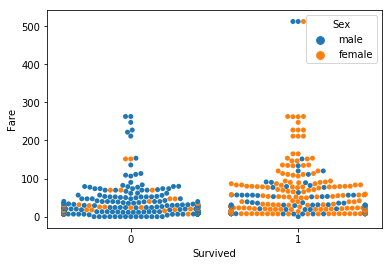

In [27]:
sns.swarmplot(x='Survived',y='Fare',hue="Sex",data=train)

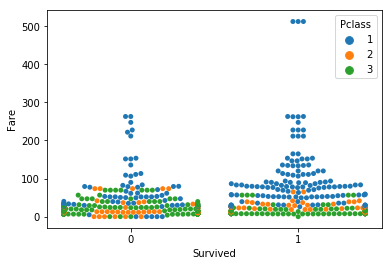

In [28]:
sns.swarmplot(x='Survived',y='Fare',hue="Pclass",data=train)

In [29]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family
PassengerId,1.000000,-0.005007,-0.035144,0.035736,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.046230,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.415037,0.083081,0.018443,-0.549500,0.065997
Age,0.035736,-0.046230,-0.415037,1.000000,-0.244183,-0.172704,0.126256,-0.253171
SibSp,-0.057527,-0.035322,0.083081,-0.244183,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172704,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.126256,0.159651,0.216225,1.000000,0.217138
family,-0.040143,0.016639,0.065997,-0.253171,0.890712,0.783111,0.217138,1.000000


(array([179., 562., 128.,  22.]),
 array([ 0.42 , 20.315, 40.21 , 60.105, 80.   ]),
 <a list of 4 Patch objects>)

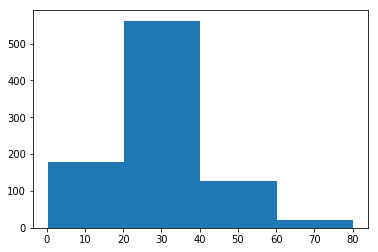

In [30]:
plt.hist(train["Age"],bins=4)

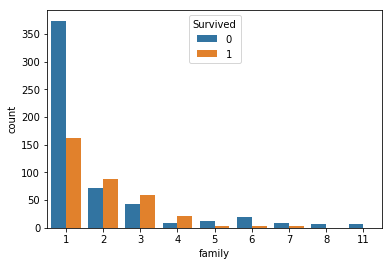

In [31]:
sns.countplot(x="family",data=train,hue="Survived")

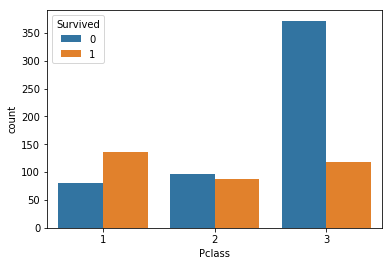

In [32]:
sns.countplot(x="Pclass",data=train,hue="Survived")

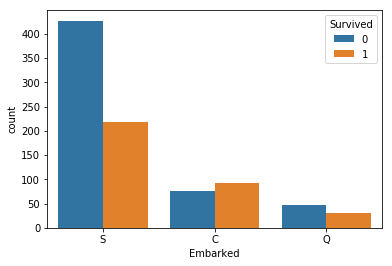

In [33]:
sns.countplot(x="Embarked",data=train,hue="Survived")

C:\Users\Sebastian john\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


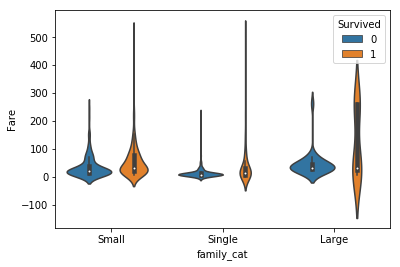

In [35]:
sns.violinplot(x="family_cat",y="Fare",hue="Survived",data=train)

# Logistic Regression Model On Titanic Data

In [81]:
#convert data to dummies
train=train.drop("PassengerId",axis=1)
train=train.drop("Name",axis=1)
train=train.drop("Ticket",axis=1)
train=train.drop("Cabin",axis=1)

In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,family_cat,titles
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,1,Single,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,2,Small,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,1,Single,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,1,Single,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,3,Small,Mrs


In [ ]:
test = test.drop("Name", axis = 1)
test = test.drop("Ticket", axis = 1)
test = test.drop("Cabin", axis = 1)

In [69]:
newtest=pd.get_dummies(test)

In [94]:
ID=test.PassengerId
ID

AttributeError: 'DataFrame' object has no attribute 'PassengerId'

In [87]:
test = test.drop("PassengerId", axis = 1)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,family_cat,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2,Small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,Single,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,Single,Mr


In [72]:
newtrain=pd.get_dummies(train)

In [88]:
newtrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Embarked_Q,Embarked_S,family_cat_Large,family_cat_Single,family_cat_Small,Titles_ Master,Titles_ Miss,Titles_ Mr,Titles_ Mrs,Titles_Others
0,1,0,3,22.0,1,0,7.2500,2,0,0,...,0,1,0,0,1,0,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,2,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3,4,1,1,35.0,1,0,53.1000,2,0,0,...,0,1,0,0,1,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [89]:
x=newtrain.drop("Survived",axis=1)
y=newtrain.Survived

In [90]:
lg=LogisticRegression()

In [91]:
lg.fit(x,y)

C:\Users\Sebastian john\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
pred_titanic=lg.predict(newtest)

ValueError: X has 19 features per sample; expecting 1739